In [240]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [241]:
ds=pd.read_csv(r"C:\Users\shobhit.saxena\Music\Python_New\Projects\diabetes.csv")

In [242]:
ds.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [243]:
ds.dtypes       ############Checking the datatypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [244]:
ds.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [245]:
ds.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [246]:
ds.shape

(768, 9)

In [247]:
ds.isnull().sum()   ###############Checking for niull values in the dataset

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x10f2c4e0>,
 'caps': [<matplotlib.lines.Line2D at 0x10f2cb70>,
 'boxes': [<matplotlib.lines.Line2D at 0x10f2c0b8>],
 'medians': [<matplotlib.lines.Line2D at 0x10f2cf98>],
 'fliers': [<matplotlib.lines.Line2D at 0x10f36588>],
 'means': []}

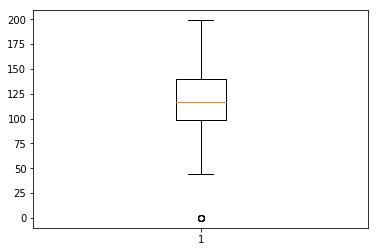

In [248]:
plt.boxplot(ds['Glucose']) ########Checking for outliers in the dataset

{'whiskers': [<matplotlib.lines.Line2D at 0x10f878d0>,
 'caps': [<matplotlib.lines.Line2D at 0x10f87f60>,
 'boxes': [<matplotlib.lines.Line2D at 0x10f874a8>],
 'medians': [<matplotlib.lines.Line2D at 0x10f92630>],
 'fliers': [<matplotlib.lines.Line2D at 0x10f92978>],
 'means': []}

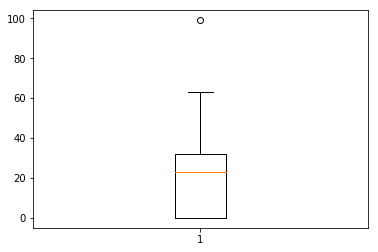

In [249]:
plt.boxplot(ds['SkinThickness'])

{'whiskers': [<matplotlib.lines.Line2D at 0x10fddef0>,
 'caps': [<matplotlib.lines.Line2D at 0x10fe75c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x10fddac8>],
 'medians': [<matplotlib.lines.Line2D at 0x10fe7c50>],
 'fliers': [<matplotlib.lines.Line2D at 0x10fe7f98>],
 'means': []}

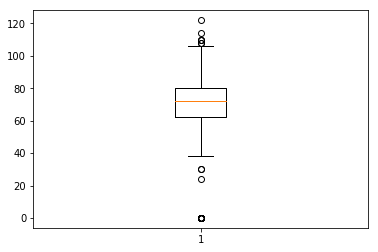

In [250]:
plt.boxplot(ds['BloodPressure'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1103ca20>,
 'caps': [<matplotlib.lines.Line2D at 0x1103ce48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1103c5f8>],
 'medians': [<matplotlib.lines.Line2D at 0x11047780>],
 'fliers': [<matplotlib.lines.Line2D at 0x11047ac8>],
 'means': []}

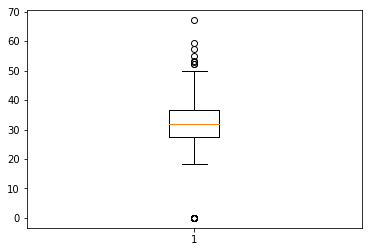

In [251]:
plt.boxplot(ds['BMI'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1109ca20>,
 'caps': [<matplotlib.lines.Line2D at 0x1109ce48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1109c5f8>],
 'medians': [<matplotlib.lines.Line2D at 0x110a7748>],
 'fliers': [<matplotlib.lines.Line2D at 0x110a7a90>],
 'means': []}

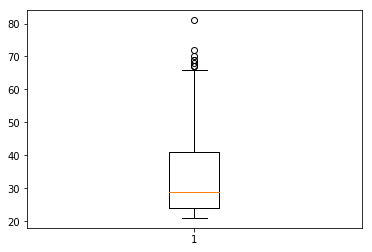

In [252]:
plt.boxplot(ds['Age'])

In [253]:
from scipy.stats import zscore
z=np.abs(zscore(ds))
z

array([[0.63994726, 0.84832379, 0.14964075, ..., 0.46849198, 1.4259954 ,
        1.36589591],
       [0.84488505, 1.12339636, 0.16054575, ..., 0.36506078, 0.19067191,
        0.73212021],
       [1.23388019, 1.94372388, 0.26394125, ..., 0.60439732, 0.10558415,
        1.36589591],
       ...,
       [0.3429808 , 0.00330087, 0.14964075, ..., 0.68519336, 0.27575966,
        0.73212021],
       [0.84488505, 0.1597866 , 0.47073225, ..., 0.37110101, 1.17073215,
        1.36589591],
       [0.84488505, 0.8730192 , 0.04624525, ..., 0.47378505, 0.87137393,
        0.73212021]])

In [254]:
treshold=3
print(np.where(z>3))

(array([  4,   7,   8,   9,  13,  15,  45,  49,  49,  58,  60,  60,  75,
        78,  81,  81,  88, 111, 123, 145, 153, 159, 172, 177, 182, 186,
       193, 220, 222, 228, 228, 247, 261, 266, 269, 286, 298, 300, 330,
       332, 336, 342, 347, 349, 357, 370, 370, 371, 371, 395, 409, 415,
       426, 426, 430, 435, 445, 445, 453, 453, 455, 459, 468, 484, 486,
       494, 494, 502, 522, 522, 533, 535, 579, 584, 589, 593, 601, 604,
       619, 621, 643, 645, 655, 666, 673, 684, 684, 695, 697, 703, 706,
       706, 753], dtype=int64), array([6, 2, 4, 5, 4, 2, 6, 2, 5, 6, 2, 5, 1, 2, 2, 5, 0, 4, 7, 5, 4, 0,
       2, 5, 1, 4, 2, 4, 2, 4, 6, 4, 2, 2, 2, 4, 0, 2, 6, 2, 2, 1, 2, 1,
       2, 4, 6, 5, 6, 6, 4, 4, 2, 5, 2, 2, 5, 6, 2, 7, 0, 7, 2, 2, 4, 2,
       5, 1, 2, 5, 2, 2, 3, 4, 2, 6, 2, 2, 2, 6, 2, 4, 4, 7, 5, 5, 7, 4,
       2, 2, 2, 5, 4], dtype=int64))


In [255]:
z[4][6]

5.484909100466951

In [256]:
z[7][2]

3.572597239872642

In [257]:
z[706][2]

3.572597239872642

In [258]:
z[753][4]

3.7353863483175385

In [259]:
ds_new=ds[(z<3).all(axis=1)]

In [260]:
ds_new.shape

(688, 9)

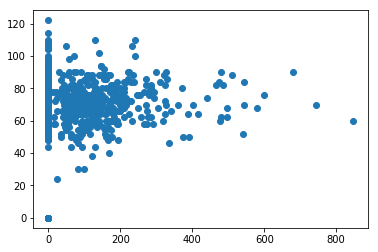

In [261]:
plt.scatter(ds['Insulin'],ds['BloodPressure']) #######Checking correlations between the variables

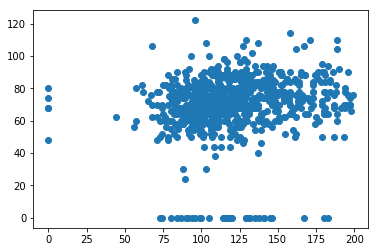

In [262]:
plt.scatter(ds['Glucose'],ds['BloodPressure'])

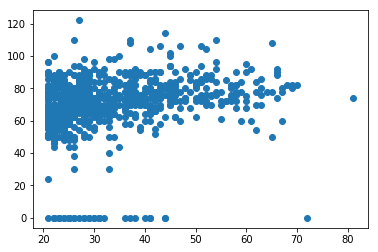

In [263]:
plt.scatter(ds['Age'],ds['BloodPressure'])

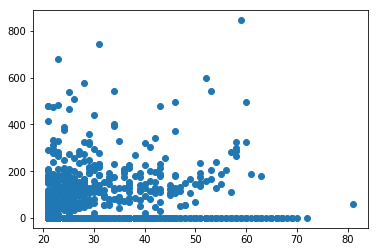

In [264]:
plt.scatter(ds['Age'],ds['Insulin'])

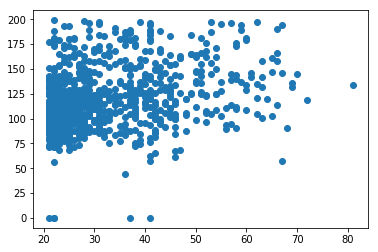

In [265]:
plt.scatter(ds['Age'],ds['Glucose'])

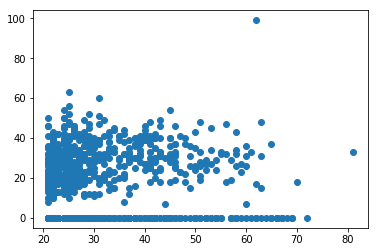

In [266]:
plt.scatter(ds['Age'],ds['SkinThickness'])

In [267]:
x=ds_new.iloc[:,0:-1]
y=ds_new.iloc[:,-1]

In [268]:
x.shape

(688, 8)

In [269]:
y.shape

(688,)

In [270]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=48)

In [271]:
x_train.shape

(460, 8)

In [272]:
y_train.shape

(460,)

In [273]:
x_test.shape

(228, 8)

In [274]:
y_test.shape

(228,)

In [275]:
lr=LogisticRegression()

In [276]:
lr.fit(x_train,y_train)

C:\Users\shobhit.saxena\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [277]:
lr.predict(x_test)

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0], dtype=int64)

In [278]:
pred=lr.predict(x_test)

In [279]:
print("Accuracy Score: ",accuracy_score(pred,y_test))

Accuracy Score:  0.7675438596491229


In [280]:
print(confusion_matrix(y_test,pred))

[[134  20]
 [ 33  41]]


In [281]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       154
           1       0.67      0.55      0.61        74

   micro avg       0.77      0.77      0.77       228
   macro avg       0.74      0.71      0.72       228
weighted avg       0.76      0.77      0.76       228



In [284]:
###################### Testing Other Algorithms
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [285]:
###########Naive Bayes Classifier
gnb=GaussianNB()
gnb.fit(x_train,y_train)

predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.7412280701754386
[[121  33]
 [ 26  48]]
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       154
           1       0.59      0.65      0.62        74

   micro avg       0.74      0.74      0.74       228
   macro avg       0.71      0.72      0.71       228
weighted avg       0.75      0.74      0.74       228



In [287]:
######## Support Vector Classifier
svc=SVC()
svc.fit(x_train,y_train)

predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.6754385964912281
[[154   0]
 [ 74   0]]
              precision    recall  f1-score   support

           0       0.68      1.00      0.81       154
           1       0.00      0.00      0.00        74

   micro avg       0.68      0.68      0.68       228
   macro avg       0.34      0.50      0.40       228
weighted avg       0.46      0.68      0.54       228



C:\Users\shobhit.saxena\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\shobhit.saxena\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\shobhit.saxena\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\shobhit.saxena\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\cl

In [288]:
##########Decision Tree Classifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.6798245614035088
[[108  46]
 [ 27  47]]
              precision    recall  f1-score   support

           0       0.80      0.70      0.75       154
           1       0.51      0.64      0.56        74

   micro avg       0.68      0.68      0.68       228
   macro avg       0.65      0.67      0.66       228
weighted avg       0.70      0.68      0.69       228



In [291]:
########### KNN Classifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.6973684210526315
[[126  28]
 [ 41  33]]
              precision    recall  f1-score   support

           0       0.75      0.82      0.79       154
           1       0.54      0.45      0.49        74

   micro avg       0.70      0.70      0.70       228
   macro avg       0.65      0.63      0.64       228
weighted avg       0.69      0.70      0.69       228



In [292]:
for k in range(25):
    k_value=k+1
    knn=KNeighborsClassifier(n_neighbors=k_value)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    print("The accuracy score is ",accuracy_score(y_test,y_pred)," at k value: ",k_value)

The accuracy score is  0.6754385964912281  at k value:  1
The accuracy score is  0.6710526315789473  at k value:  2
The accuracy score is  0.6447368421052632  at k value:  3
The accuracy score is  0.6929824561403509  at k value:  4
The accuracy score is  0.6973684210526315  at k value:  5
The accuracy score is  0.7149122807017544  at k value:  6
The accuracy score is  0.7149122807017544  at k value:  7
The accuracy score is  0.7192982456140351  at k value:  8
The accuracy score is  0.7192982456140351  at k value:  9
The accuracy score is  0.7236842105263158  at k value:  10
The accuracy score is  0.7192982456140351  at k value:  11
The accuracy score is  0.7280701754385965  at k value:  12
The accuracy score is  0.7280701754385965  at k value:  13
The accuracy score is  0.7149122807017544  at k value:  14
The accuracy score is  0.7280701754385965  at k value:  15
The accuracy score is  0.7149122807017544  at k value:  16
The accuracy score is  0.7236842105263158  at k value:  17
The ac

In [ ]:
######### Since Logistic Rergression is giving us a good accuracy i.e. 76.75% , we are selecting this model for our testing purpose.